# Sur quels paramètres l'altitude influe-t-elle le plus ?

## Code

In [19]:
import pandas as pd

results = pd.read_csv(
                'C:/DEVOIRS/ENSAI1A/projet-info/data/results.csv'
                )
status = pd.read_csv('C:/DEVOIRS/ENSAI1A/projet-info/data/status.csv')
races = pd.read_csv('C:/DEVOIRS/ENSAI1A/projet-info/data/races.csv')
circuits = pd.read_csv('C:/DEVOIRS/ENSAI1A/projet-info/data/circuits.csv')

jointure = pd.merge(results, status, on='statusId', how='left')
jointure = pd.merge(jointure, races, on='raceId', how='left')
jointure = pd.merge(jointure, circuits, on='circuitId', how='left')

jointure = jointure[['resultId', 'location', 'statusId', 'status']]
jointure

,resultId,location,statusId,status
0,1,Melbourne,1,Finished
1,2,Melbourne,1,Finished
2,3,Melbourne,1,Finished
3,4,Melbourne,1,Finished
4,5,Melbourne,1,Finished
...,...,...,...,...
26514,26520,Silverstone,12,+2 Laps
26515,26521,Silverstone,12,+2 Laps
26516,26522,Silverstone,12,+2 Laps
26517,26523,Silverstone,34,Water pressure


### Problèmes moteur

In [55]:
jointure_pb_moteur = jointure[jointure['statusId'] == 5]
pb_moteur_par_ville = jointure_pb_moteur.groupby('location').size()
moyenne_pb_moteur_par_ville = pb_moteur_par_ville.mean()

nb_pb_moteur_mexique = len(jointure[jointure.statusId == 5][jointure.location == 'Mexico City'])
nb_pb_moteur_mexique

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_17508/254012180.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nb_pb_moteur_mexique = len(jointure[jointure.statusId == 5][jointure.location == 'Mexico City'])


50

### Problèmes de frein

In [56]:
jointure_pb_frein = jointure[jointure['statusId'] == 23]
pb_frein_par_ville = jointure_pb_frein.groupby('location').size()
moyenne_pb_frein_par_ville = pb_frein_par_ville.mean()

nb_pb_frein_mexique = len(jointure[jointure.statusId == 23][jointure.location == 'Mexico City'])
nb_pb_frein_mexique

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_17508/2321736852.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nb_pb_frein_mexique = len(jointure[jointure.statusId == 23][jointure.location == 'Mexico City'])


4

### Problèmes de refroidissement

In [57]:
jointure_pb_refroidissement = jointure[jointure['statusId'] == 25]
pb_refroidissement_par_ville = jointure_pb_refroidissement.groupby('location').size()
moyenne_pb_refroidissement_par_ville = pb_refroidissement_par_ville.mean()

nb_pb_refroidissement_mexique = len(jointure[jointure.statusId == 25][jointure.location == 'Mexico City'])
nb_pb_refroidissement_mexique

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_17508/592535335.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nb_pb_refroidissement_mexique = len(jointure[jointure.statusId == 25][jointure.location == 'Mexico City'])


8

## Graphique

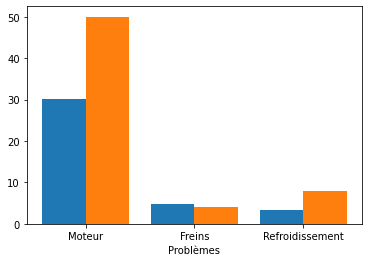

In [58]:
import matplotlib.pyplot as plt
import numpy as np

def double_barplot():
    # Abscisses
    x = ['Moteur', 'Freins', 'Refroidissement']

    # Hauteurs
    nb_total = [moyenne_pb_moteur_par_ville, moyenne_pb_frein_par_ville, moyenne_pb_refroidissement_par_ville]
    nb_mexico = [nb_pb_moteur_mexique, nb_pb_frein_mexique, nb_pb_refroidissement_mexique]

    # Barplots
    plt.bar(x=x, height=nb_total, width=-0.4, align='edge')
    plt.bar(x=x, height=nb_mexico, width=+0.4, align='edge')

    # Barres de l'axe des abscisses
    plt.xticks(x)
    plt.xlabel('Problèmes')

    # Affichage de la figure
    plt.show()


double_barplot()